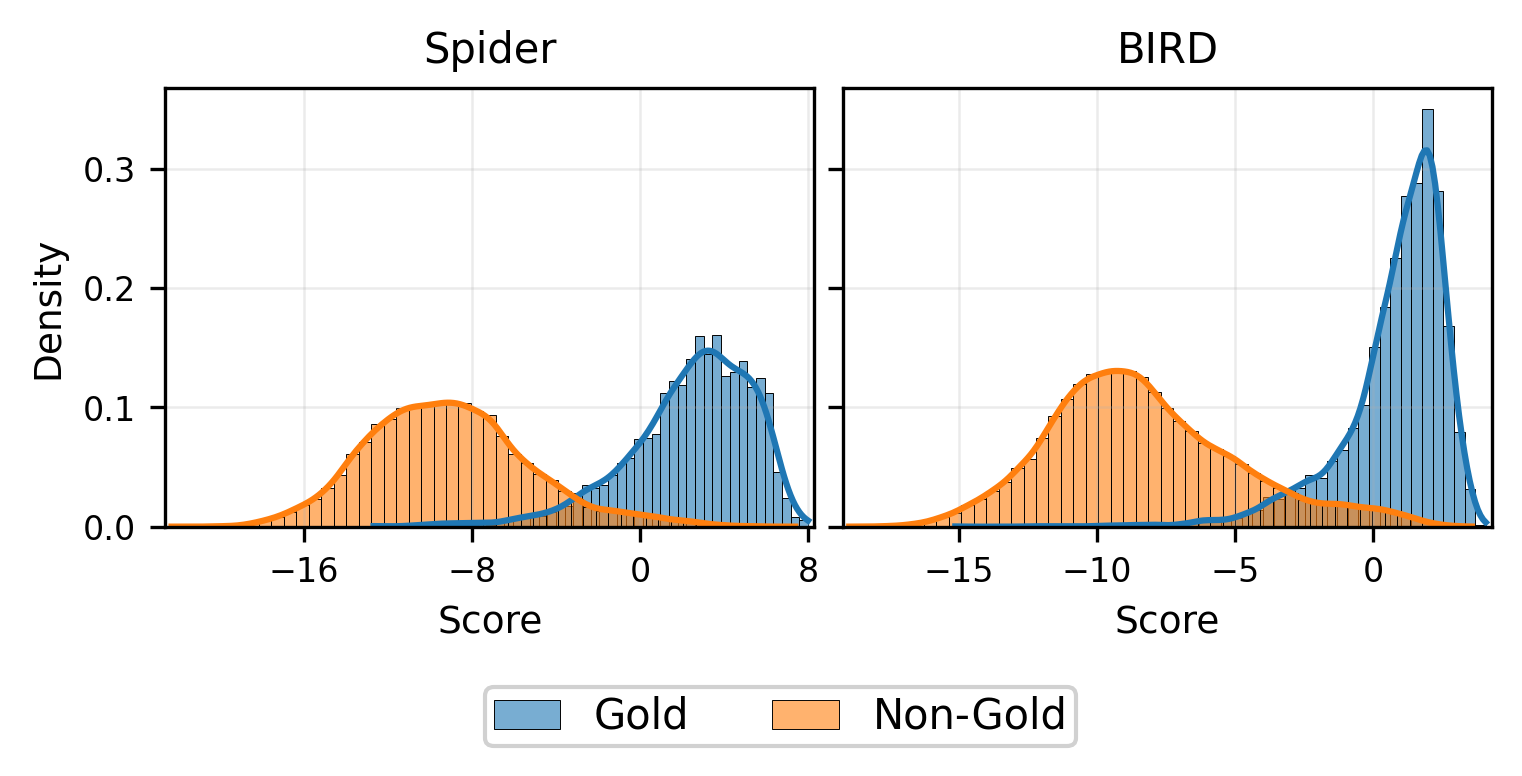

Saved score distribution → figures/score_distribution.png


In [1]:
#!/usr/bin/env python3
"""
score_distribution.py
────────────────────
Load score distribution data from CSV files and create visualization figures.

Simple script following the style of threshold_visualization.ipynb
Can be copied and pasted into Jupyter notebook.
"""

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from pathlib import Path

# Set style parameters (same as notebook)
plt.rcParams.update({
    "font.size": 10,
    "axes.titlesize": 10,
    "axes.labelsize": 9,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "legend.fontsize": 8,
})

def plot_score_distribution(csv1_path: Path, csv2_path: Path, output_dir: Path):
    """Create score distribution plots following notebook style."""
    
    # Load CSV files
    df1 = pd.read_csv(csv1_path)
    df2 = pd.read_csv(csv2_path)
    
    # Extract labels from filenames
    # label1 = csv1_path.stem.replace('score_distribution_', '').replace('_no_fk', ' (no FK)')
    # label2 = csv2_path.stem.replace('score_distribution_', '').replace('_no_fk', ' (no FK)')
    label1 = "Spider"
    label2 = "BIRD"
    
    # Create subplots following notebook style
    fig, axes = plt.subplots(1, 2, figsize=(5, 3), dpi=300, sharey=True)
    
    def plot_panel(ax, df, title):
        # Separate gold and non-gold scores
        gold_scores = df[df['type'] == 'gold']['score'].values
        non_gold_scores = df[df['type'] == 'non_gold']['score'].values
        
        # Plot histograms using seaborn style (like evaluate_on_the_fly_embeddings.py)
        sns.histplot(gold_scores, kde=True, stat='density', bins=50, label="Gold", alpha=0.6, ax=ax)
        sns.histplot(non_gold_scores, kde=True, stat='density', bins=50, label="Non-Gold", alpha=0.6, ax=ax)
        
        ax.set_title(title)
        ax.set_xlabel("Score")
        ax.set_ylabel("Density")
        ax.grid(alpha=0.25, linewidth=0.6)
        ax.margins(x=0.01, y=0.05)
        # ax.set_ylim(0.0, 1.03)
        # Fewer x-ticks
        ax.xaxis.set_major_locator(mticker.MaxNLocator(nbins=5, prune=None))
        return ax
    
    # Plot panels
    ax1 = plot_panel(axes[0], df1, label1)
    ax2 = plot_panel(axes[1], df2, label2)
    axes[0].set_ylabel("Density")
    
    # Get handles for legend (following notebook style)
    handles, labels = ax1.get_legend_handles_labels()
    
    # One horizontal legend at the bottom (following notebook style)
    fig.legend(
        handles, labels,
        loc="lower center",
        ncol=2,                # horizontal: 2 entries on one line
        fontsize=10,
        frameon=True, framealpha=0.9, borderpad=0.2, handlelength=1.6,
        bbox_to_anchor=(0.52, 0.05)
    )
    
    # Reserve space for legend (following notebook style)
    fig.tight_layout(pad=0.2, rect=(0, 0.18, 1, 1))
    
    # shrink axes heights to 80%
    for ax in axes:
        box = ax.get_position()
        ax.set_position((box.x0, box.y0, box.width, box.height*0.8))
    
    # Save
    output_path = output_dir / "score_distribution.png"
    plt.savefig(output_path, bbox_inches="tight", pad_inches=0.02)
    plt.show()
    print(f"Saved score distribution → {output_path}")
    plt.close()


# Example usage (modify these paths as needed)
csv1_path = Path("/home/datht/graph-schema/logs/spider_dev_qwen_end2end/score_distribution_spider_dev_end2end.csv")
csv2_path = Path("/home/datht/graph-schema/logs/bird_dev_qwen_end2end/score_distribution_bird_dev_end2end.csv")
output_dir = Path("figures")

# Create output directory
output_dir.mkdir(parents=True, exist_ok=True)
plot_score_distribution(csv1_path, csv2_path, output_dir)
    